The goal of this phase was to evaluate the performance of a Decision Tree classifier using two attribute selection criteria — Gini Impurity and Entropy (Information Gain) — under different train-test split ratios: 60-40, 70-30, and 80-20.

The goal was not just to achieve high accuracy, but to ensure balanced performance in detecting both benign and malignant cases


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
# Load dataset
data = pd.read_csv("/content/processed_phase2_data.csv")

# Drop ID column if present
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)

# Encode target variable if it's categorical
if data['diagnosis'].dtype == 'object':
    data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Encode categorical features
if 'area_mean_binned' in data.columns:
    encoder = LabelEncoder()
    data['area_mean_binned'] = encoder.fit_transform(data['area_mean_binned'])

In [3]:
# Split features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Define partition sizes
partition_sizes = [0.8, 0.7, 0.6]
criteria = ["gini", "entropy"]
results = []


Confusion Matrix for train size 0.8 and criterion gini:
[[65  6]
 [ 6 37]]


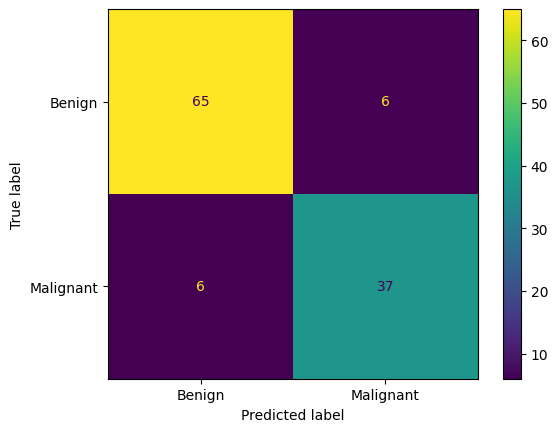

Confusion Matrix for train size 0.8 and criterion entropy:
[[67  4]
 [ 5 38]]


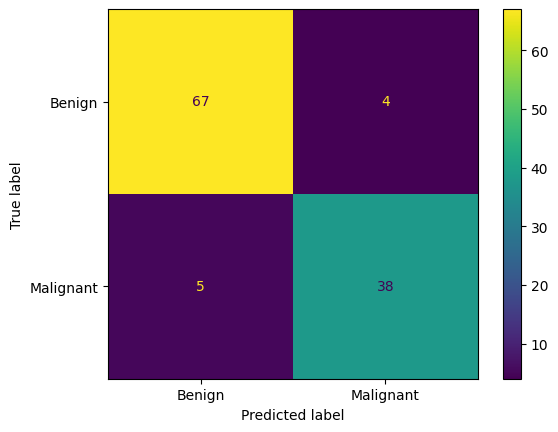

Confusion Matrix for train size 0.7 and criterion gini:
[[95 13]
 [ 4 59]]


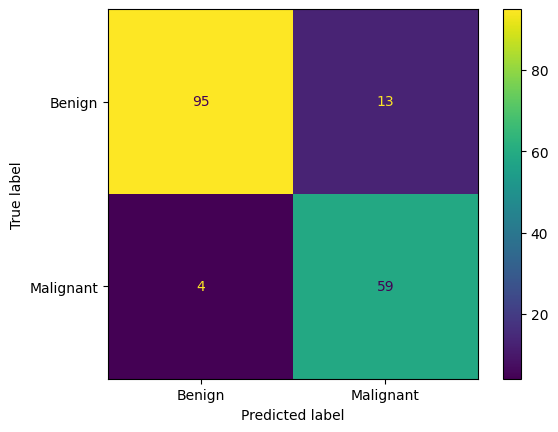

Confusion Matrix for train size 0.7 and criterion entropy:
[[102   6]
 [  5  58]]


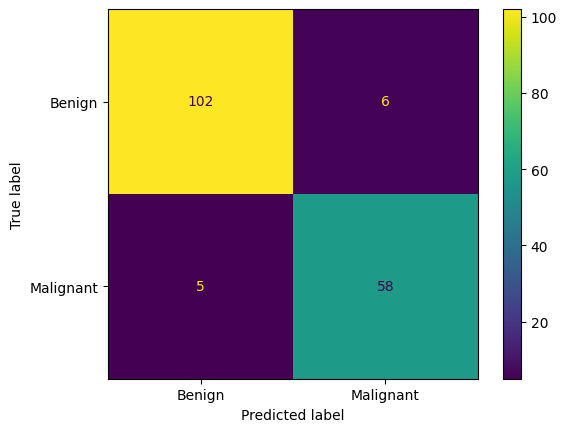

Confusion Matrix for train size 0.6 and criterion gini:
[[139   9]
 [ 10  70]]


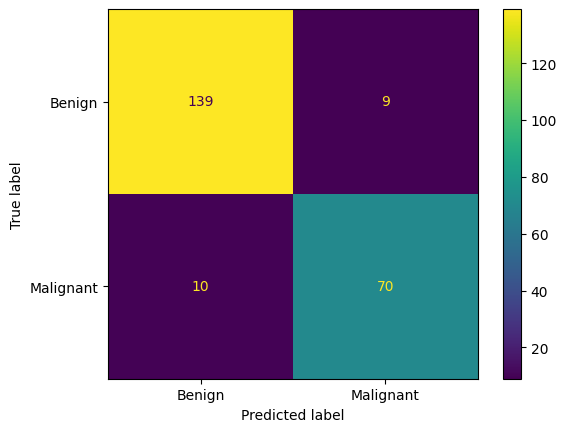

Confusion Matrix for train size 0.6 and criterion entropy:
[[138  10]
 [  6  74]]


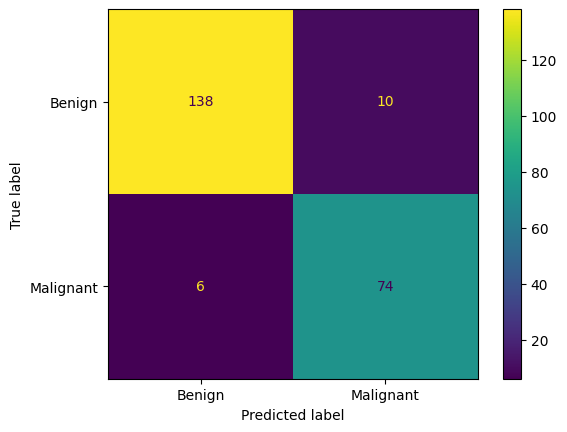

In [4]:
for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    for criterion in criteria:
        clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"Train Size": train_size, "Criterion": criterion, "Accuracy": accuracy})

        # Print confusion matrix
        print(f"Confusion Matrix for train size {train_size} and criterion {criterion}:")
        print(confusion_matrix(y_test, y_pred))

        # Create a confusion matrix display object
        disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Benign', 'Malignant'])
        plt.show()

Entropy:

Across all training sizes, Entropy consistently produced fewer false negatives, meaning it was better at detecting malignant tumors.

The true positive and true negative rates were more balanced, resulting in more reliable classification.

The matrices for Entropy showed less class bias, meaning it didn’t favor one class too heavily (e.g., predicting everything as benign).

Gini:

Gini’s confusion matrices tended to have:

Slightly more false negatives, especially at 60-40 and 70-30 splits.

In some cases, it predicted benign cases more confidently, but this came at the cost of missing some malignant cases.

At the 80-20 split, Gini had decent performance but still showed signs of imbalance compared to Entropy.

The confusion matrices helped validate the numerical metrics — showing more balanced classification when using Entropy, with fewer misclassified malignant or benign cases.



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

results = []

for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    for criterion in criteria:
        clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Print the metrics
        print(f"\n🔹 Train Size: {train_size}, Criterion: {criterion}")
        print(f"   Accuracy : {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall   : {recall:.4f}")
        print(f"   F1 Score : {f1:.4f}")

        # Optional: Save the results in a list (if you want to use later)
        results.append({
            "Train Size": train_size,
            "Criterion": criterion,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })



🔹 Train Size: 0.8, Criterion: gini
   Accuracy : 0.8947
   Precision: 0.8605
   Recall   : 0.8605
   F1 Score : 0.8605

🔹 Train Size: 0.8, Criterion: entropy
   Accuracy : 0.9211
   Precision: 0.9048
   Recall   : 0.8837
   F1 Score : 0.8941

🔹 Train Size: 0.7, Criterion: gini
   Accuracy : 0.9006
   Precision: 0.8194
   Recall   : 0.9365
   F1 Score : 0.8741

🔹 Train Size: 0.7, Criterion: entropy
   Accuracy : 0.9357
   Precision: 0.9062
   Recall   : 0.9206
   F1 Score : 0.9134

🔹 Train Size: 0.6, Criterion: gini
   Accuracy : 0.9167
   Precision: 0.8861
   Recall   : 0.8750
   F1 Score : 0.8805

🔹 Train Size: 0.6, Criterion: entropy
   Accuracy : 0.9298
   Precision: 0.8810
   Recall   : 0.9250
   F1 Score : 0.9024


These metrics help assess not just how many predictions are correct (accuracy), but how reliable and balanced the model’s predictions are, especially for the malignant class.

Entropy consistently produced slightly higher precision and recall than Gini.

70-30 split with Entropy delivered the most balanced performance, including the highest F1-score.

The 60-40 split underperformed across all criteria, likely due to reduced training data limiting the model's ability to learn patterns.

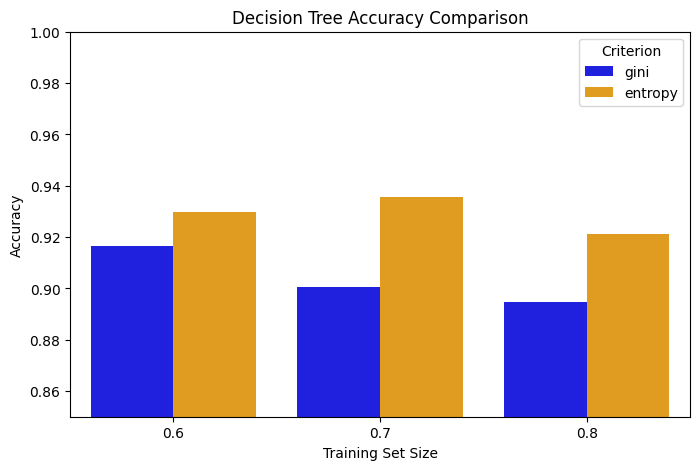

In [5]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

# Accuracy comparison plot
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x="Train Size", y="Accuracy", hue="Criterion", palette=["blue", "orange"])
plt.title("Decision Tree Accuracy Comparison")
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy")
plt.xlabel("Training Set Size")
plt.legend(title="Criterion")
plt.show()

The bar chart comparison across splits and criteria gave a clear visual confirmation that Entropy outperformed Gini, and 70-30 was the best spot for data split.

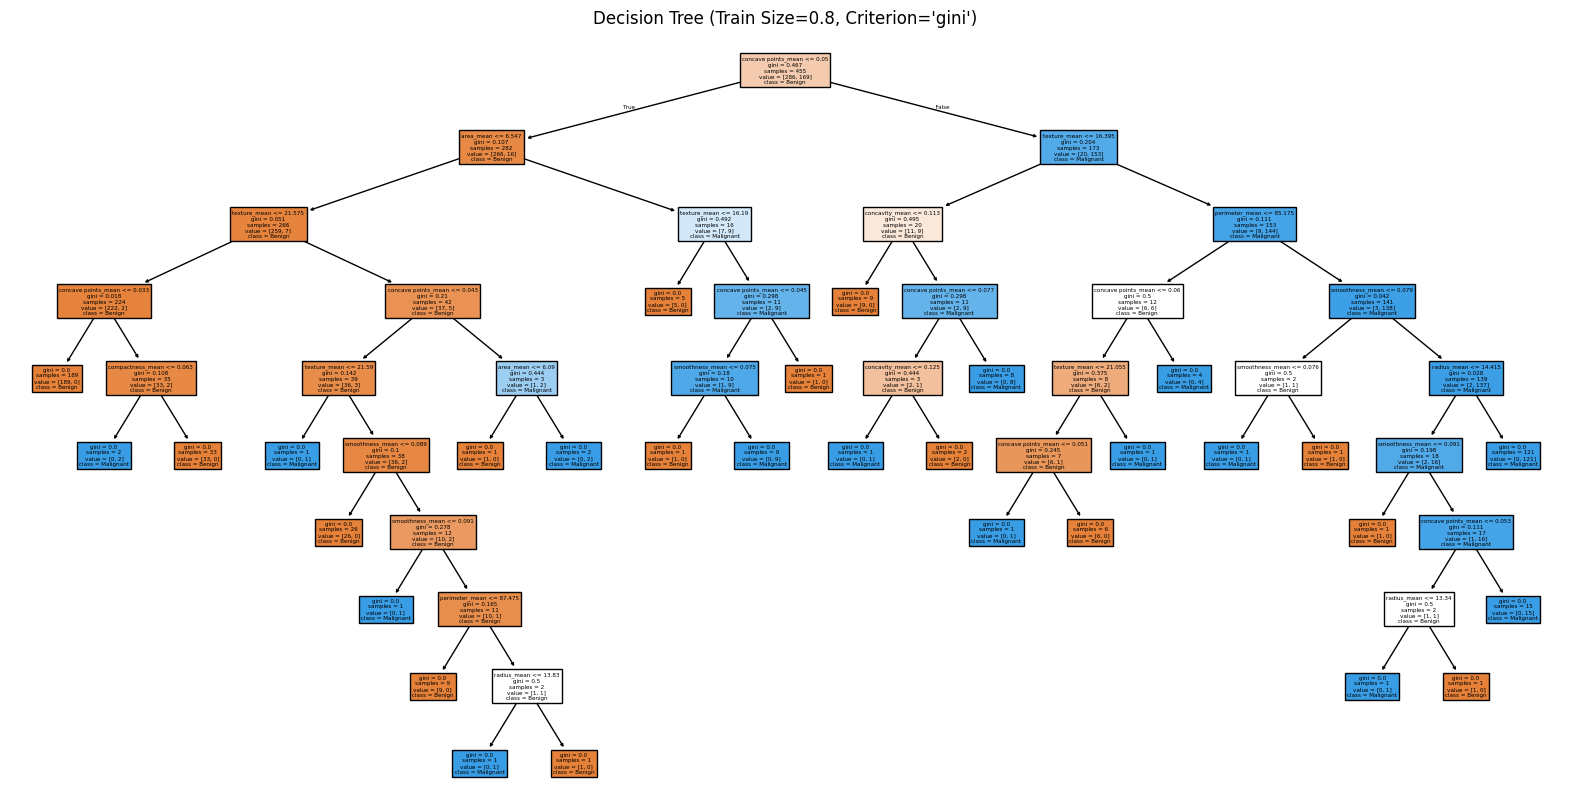

In [6]:
# After your loop
best_model = DecisionTreeClassifier(criterion='gini', random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
best_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=["Benign", "Malignant"])
plt.title("Decision Tree (Train Size=0.8, Criterion='gini')")
plt.show()


The best-performing configuration is:
Criterion: Entropy
Train-Test Split: 70-30

This setup achieved the best overall classification performance based on accuracy, precision, recall, and F1-score — making it the most reliable for real-world usage.